# Project 4 - Exploratory Data Analysis

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from functions import monthly, plot_acf_pacf, plot_preds

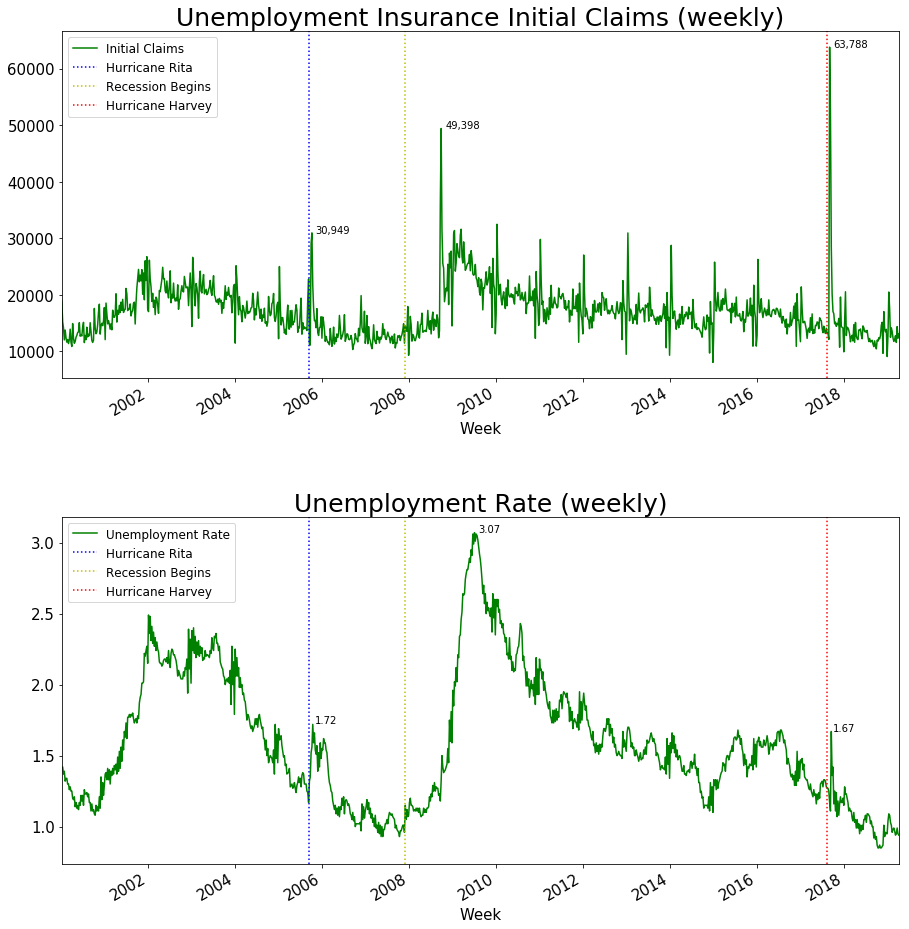

In [154]:
fig, axes = plt.subplots(2, figsize=(15, 17))
# Initial claims
unemp['initial_claims'].plot(c='g', fontsize=15, label='Initial Claims', ax=axes[0])
axes[0].axvline(x='2005-09-17', color='b', linestyle=':').set_label('Hurricane Rita')
axes[0].text(x='2005-11', y=30951, s='30,949')

axes[0].axvline(x='2007-12', color='y', linestyle=':').set_label('Recession Begins')
axes[0].text(x='2008-11', y=49400, s='49,398')

axes[0].axvline(x='2017-08-13', color='r', linestyle=':').set_label('Hurricane Harvey')
axes[0].text(x='2017-10', y=63800, s='63,788')

axes[0].set_xlabel('Week', fontsize=15)
axes[0].legend(fontsize='large')
axes[0].set_title('Unemployment Insurance Initial Claims (weekly)', fontsize=25);

# Unemployment rate
unemp['unemployment_rate'].plot(c='g', fontsize=15, label='Unemployment Rate', ax=axes[1])
axes[1].axvline(x='2005-09-17', color='b', linestyle=':').set_label('Hurricane Rita')
axes[1].text(x='2005-11', y=1.73, s='1.72')

axes[1].axvline(x='2007-12', color='y', linestyle=':').set_label('Recession Begins')
axes[1].text(x='2009-08', y=3.07, s='3.07')

axes[1].axvline(x='2017-08-13', color='r', linestyle=':').set_label('Hurricane Harvey')
axes[1].text(x='2017-10', y=1.67, s='1.67')

axes[1].set_xlabel('Week', fontsize=15)
axes[1].legend(fontsize='large')
axes[1].set_title('Unemployment Rate (weekly)', fontsize=25)

plt.subplots_adjust(hspace=.4);

## Hurricane Harvey - Weekly Unemployment (Statewide)

In [155]:
pre_harvey = unemp['initial_claims'][:887]
post_harvey = unemp['initial_claims'][886:]

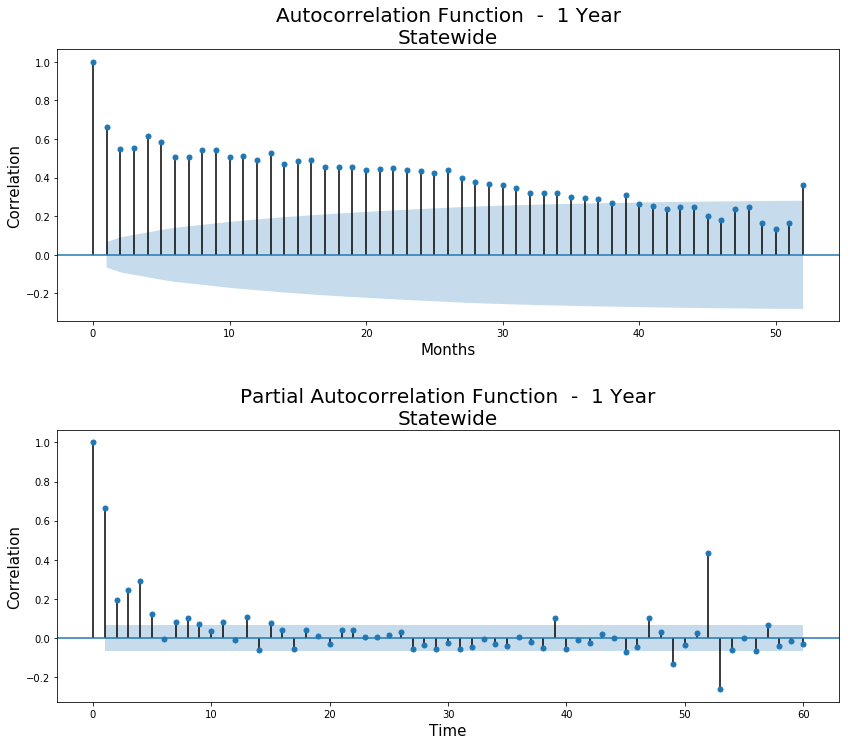

In [203]:
plot_acf_pacf(pre_harvey, 52, '1 Year', 'Statewide')

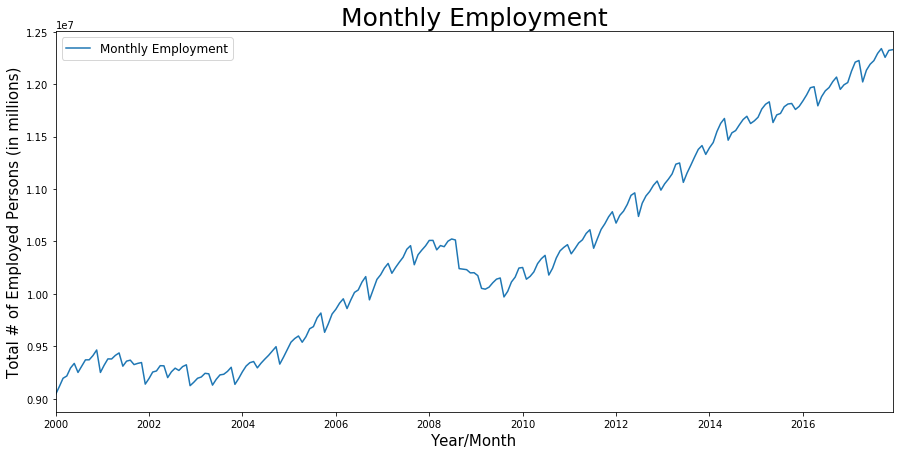

In [405]:
ax = monthly.plot(figsize=(15,7), label='Monthly Employment - Statewide')
ax.set_xticklabels(['2000', '2002', '2004', '2006', '2008', '2010', '2012', '2014', '2016', '2018'])
ax.set_xlabel('Year/Month', fontsize=15)
ax.set_ylabel('Total # of Employed Persons (in millions)', fontsize=15)
ax.set_title('Monthly Employment', fontsize=25)

ax.legend(labels=['Monthly Employment'], fontsize=12);

Somewhat interestingly, the average wage is very highly correlated with the number of companies in the state.

In [182]:
wages.corr()[['avg_wage']].sort_values(by='avg_wage', ascending=False)[1:]

,avg_wage
total_wages,0.987663
year,0.960004
estabs,0.952854
firms,0.944586
month_3,0.942355
avg_emp,0.939948
month_2,0.939740
month_1,0.937178
period,0.044662


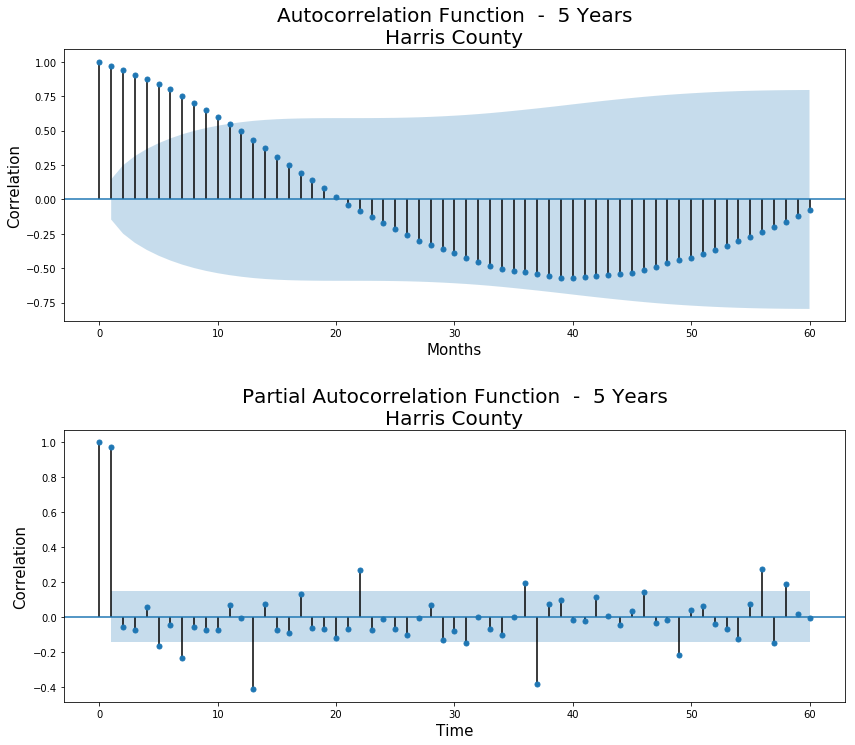

In [198]:
plot_acf_pacf(pre_harris, 60, '5 Years', 'Harris County')

### Jefferson County Construction Employment

In [205]:
# Divide dataframe into pre and post Harvey
pre_jefferson = jefferson['2001':'2015']
post_jefferson = jefferson['2016':]

In [206]:
# Checking for stationarity
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

interpret_dftest(adfuller(pre_jefferson['employment']))

Test Statistic   -1.986744
p-value           0.292415
dtype: float64

In [216]:
# Iterate through all possible differences.
for d in range(1, len(pre_jefferson['employment'])):
    if interpret_dftest(adfuller(pre_jefferson['employment'].diff(d).dropna()))['p-value'] < 0.05:
        print(f'd={d} yields a stationary time series')
        break

d=1 yields a stationary time series


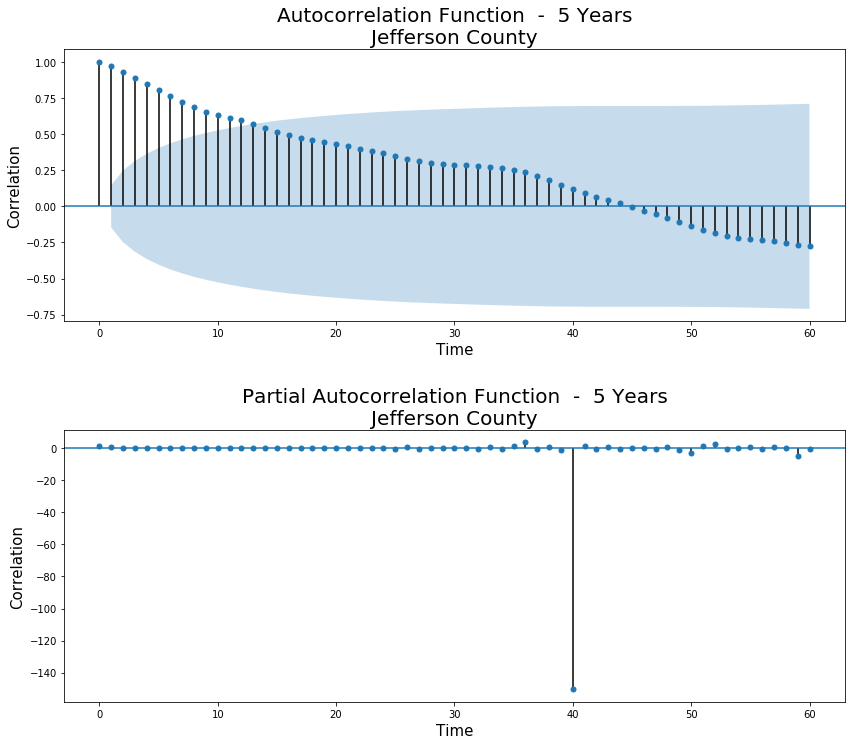

In [212]:
plot_acf_pacf(pre_jefferson, 60, '5 Years', 'Jefferson County')

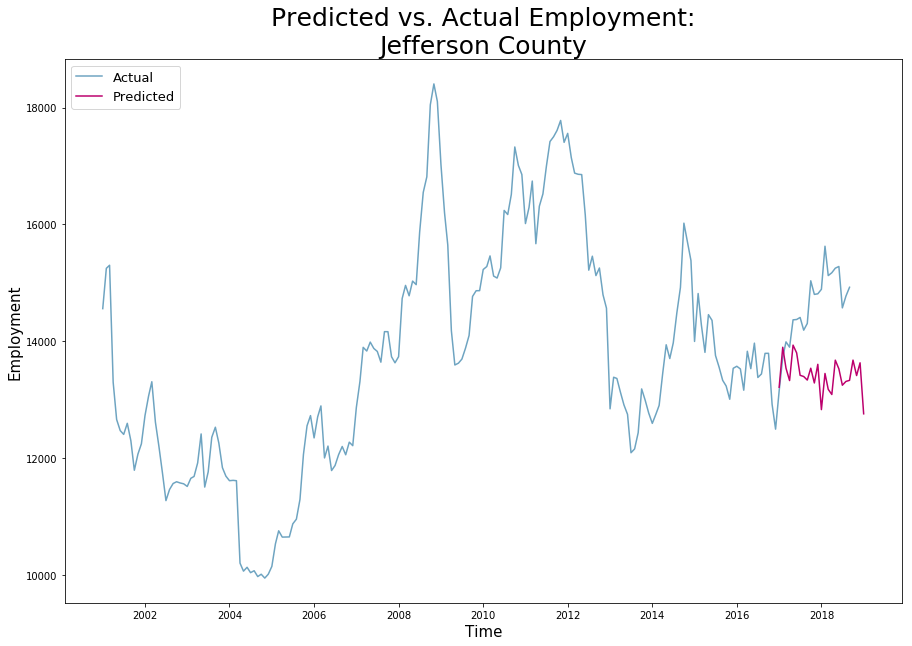

In [465]:
# Running an ARIMA model to predict post-Harvey employment
model = SARIMAX(pre_jefferson,
                order=(1,1,0),
               seasonal_order=(1,1,0,12))
sarima = model.fit()
preds_post_jefferson = sarima.predict(start='2017', end='2019')

plot_preds(jefferson, preds_post_jefferson, 'Jefferson County', 'Employment');

### Orange County Construction Employment

In [258]:
pre_orange = orange['2001':'2015']
post_orange = orange['2016':]

In [259]:
# Checking for stationarity
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

interpret_dftest(adfuller(pre_orange['employment']))

Test Statistic   -2.080823
p-value           0.252295
dtype: float64

In [260]:
# Iterate through all possible differences.
for d in range(1, len(pre_jefferson['employment'])):
    if interpret_dftest(adfuller(pre_jefferson['employment'].diff(d).dropna()))['p-value'] < 0.05:
        print(f'd={d} yields a stationary time series')
        break

d=1 yields a stationary time series


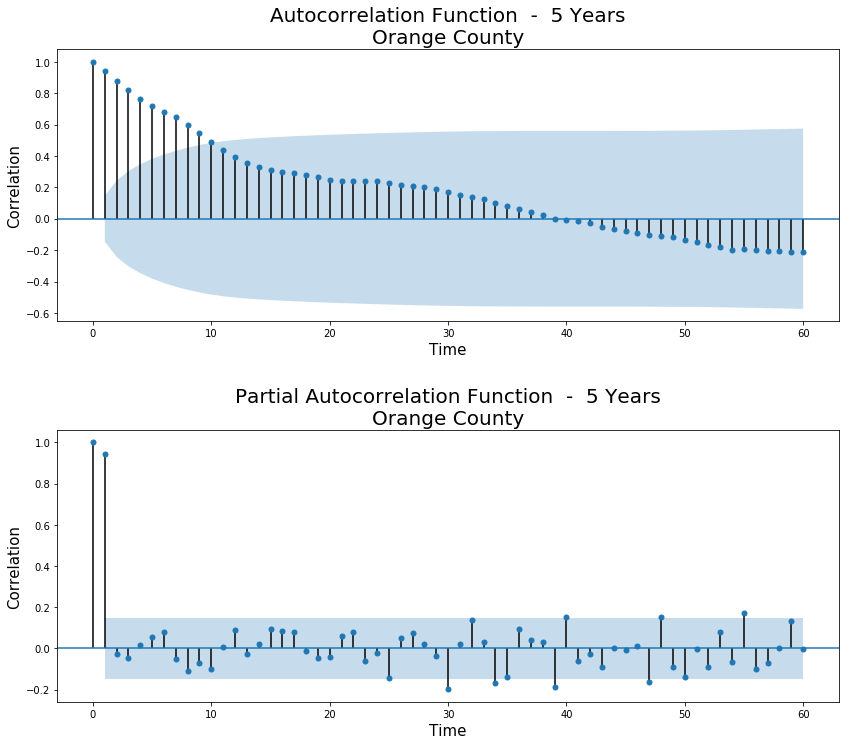

In [261]:
plot_acf_pacf(pre_orange, 60, '5 Years', 'Orange County')

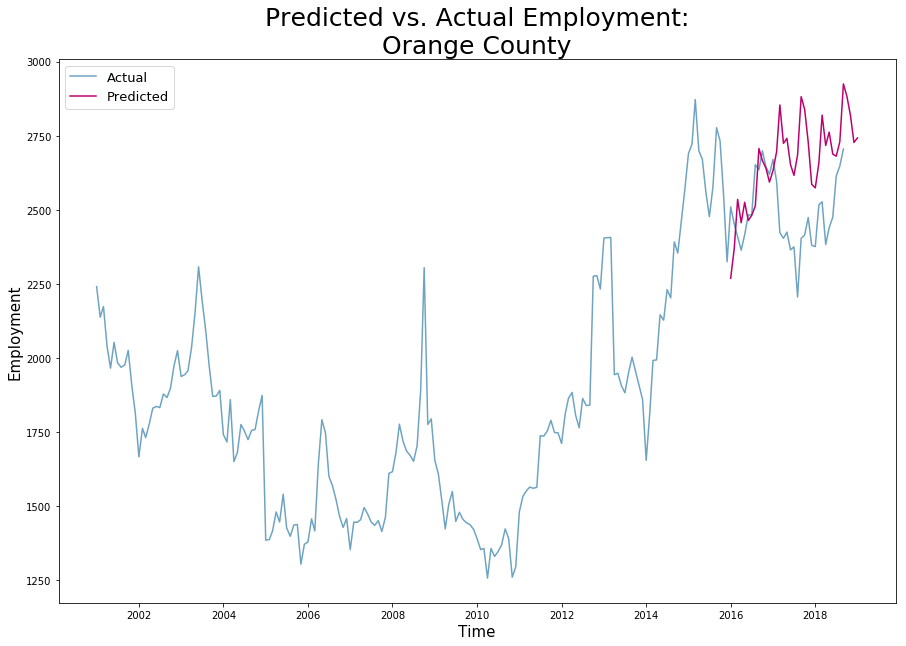

In [278]:
# Running an ARIMA model to predict post-Harvey employment
model = SARIMAX(pre_orange,
                order=(1,1,0),
               seasonal_order=(1,1,0,12))
sarima = model.fit()
preds_post_orange = sarima.predict(start='2016', end='2019')

plot_preds(orange, preds_post_orange, 'Orange County', 'Employment');

# Harvey  & Rita Data

In [455]:
harvey = pd.read_csv('./materials/harvey_data.csv')
harvey = harvey.drop(harvey.iloc[:, 18:34], axis=1)
rita = pd.read_csv('./materials/rita_data.csv')
rita = rita.drop(rita.iloc[:, 18:34], axis=1)

# Wage data 
wages_harvey_cty = [each for each in list(set(wages_county['county'].values)) if each in harvey['county'].values]
wages_rita_cty = [each for each in list(set(wages_county['county'].values)) if each in rita['county'].values]
wages_harvey = wages_county.loc[wages_county['county'].isin(wages_harvey_cty)]
wages_rita = wages_county.loc[wages_county['county'].isin(wages_rita_cty)]

In [462]:
harvey.loc[harvey['county'] == 'orange', 'Popula2013']

30    82816
Name: Popula2013, dtype: int64

## Hurricane Harvey - Quarterly Wages & Employment

In [ ]:
# Top three counties with the most damage assessed by FEMA
sorted(list(harvey.sort_values(by='total_damage', ascending=False)['county'].head(3).values))

In [ ]:
harris = wages_harvey[wages_harvey['county'] == 'harris']
jefferson = wages_harvey[wages_harvey['county'] == 'harris']
orange = wages_harvey[wages_harvey['county'] == 'harris']

### Harris County - Wages

In [ ]:
# Not including 2017 or quarters post-Harvey
harris_harvey = harris.iloc[:70]

In [ ]:
# Checking for stationarity
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

interpret_dftest(adfuller(harris_harvey['avg_wage']))

The wage data are not stationary. We'll need to difference the data.

In [ ]:
# Iterate through all possible differences.
for d in range(1, len(harris_harvey['avg_wage'])):
    if interpret_dftest(adfuller(harris_harvey['avg_wage'].diff(d).dropna()))['p-value'] < 0.05:
        print(f'd={d} yields a stationary time series')
        break

In [ ]:
plot_acf(harris_harvey['avg_wage'].diff(6).dropna());

In [ ]:
plot_pacf(harris_harvey['avg_wage'].diff(6).dropna(), lags=4);

In [ ]:
.diff(6)

In [ ]:
model = ARIMA(endog = harris_harvey['avg_wage'].dropna(), order=(1,0,1))
arima = model.fit()
preds = arima.predict()

In [ ]:
plt.plot(preds);
plt.plot(harris_harvey['avg_wage']);

## Hurricane Harvey - Weekly Unemployment (Statewide)

In [ ]:
unemp[:887]
# Checking for stationarity
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

interpret_dftest(adfuller(unemp['initial_claims'][:887]))

In [ ]:
# Iterate through all possible differences.
for d in range(1, len(unemp['initial_claims'])):
    if interpret_dftest(adfuller(unemp['initial_claims'].diff(d).dropna()))['p-value'] < 0.05:
        print(f'd={d} yields a stationary time series')
        break

In [ ]:
plot_acf(unemp['initial_claims'], lags=52);

In [ ]:
plot_pacf(unemp['initial_claims'], lags=52);

In [ ]:
unemp.head()

In [ ]:
pre_harvey = unemp['initial_claims'][:887]
post_harvey = unemp['initial_claims'][886:]

model = SARIMAX(pre_harvey,
                order=(1,0,0),
                seasonal_order=(1, 1, 1, 52))
sarima = model.fit()
preds_pre = sarima.predict('2000', '2016')
preds_post = sarima.predict('2016', '2020')

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
plt.plot(pre_harvey, label='Actual Pre-Harvey', alpha=0.5, c='#6ac0c1')
plt.plot(post_harvey, label='Actual Post-Harvey', alpha=0.5, c='#467e7f')
plt.plot(preds, label='Predicted Pre-Harvey', c='#d34791')
plt.plot(preds_post, label='Predicted Post-Harvey', c='#b7005e')
plt.legend();

## Hurricane Rita - Weekly Unemployment (Statewide)

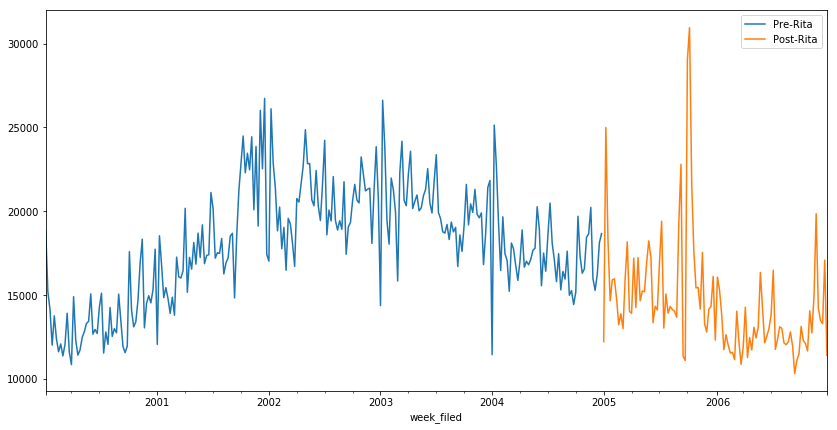

In [406]:
# splitting data
pre_rita = unemp[:'2004'][['initial_claims']]
post_rita = unemp['2005':'2006'][['initial_claims']]

# plot
pre_rita['initial_claims'].plot(label = 'Pre-Rita', figsize=(14,7))
post_rita['initial_claims'].plot(label = 'Post-Rita')
plt.legend();

In [235]:
# check for stationarity
interpret_dftest(adfuller(pre_rita['initial_claims']))

Test Statistic   -2.20134
p-value           0.20576
dtype: float64

In [236]:
# Find a value for d
for d in range(1, len(pre_rita)):
    if interpret_dftest(adfuller(pre_rita['initial_claims'].diff(d).dropna()))['p-value'] < 0.05:
        print(f'd={d} yields a stationary time series')
        break

d=1 yields a stationary time series


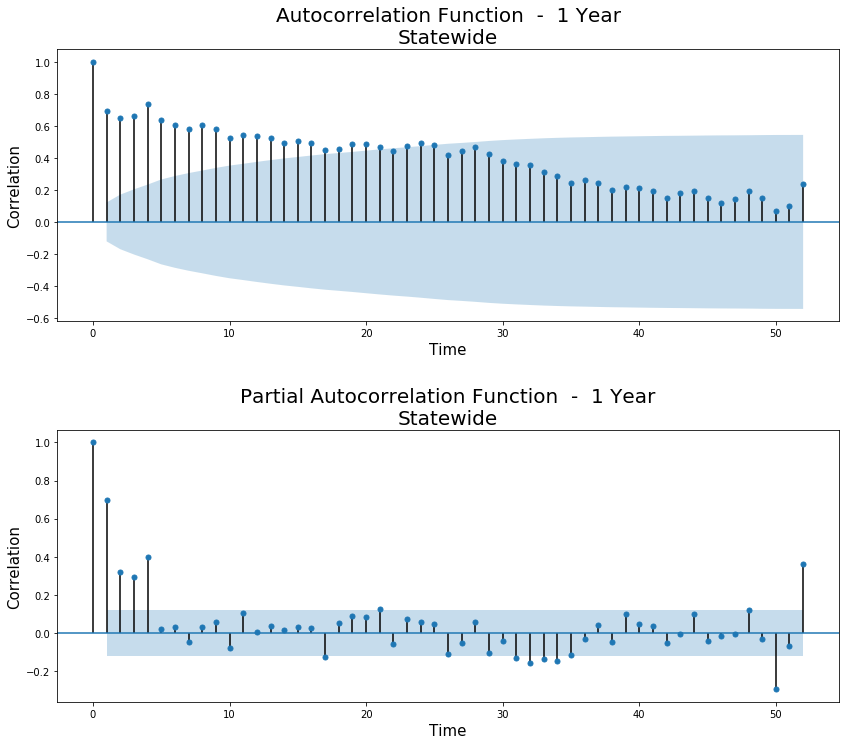

In [238]:
plot_acf_pacf(pre_rita, lags=52, time_range='1 Year', county_name='Statewide')

In [475]:
sarima = SARIMAX(endog = pre_rita['initial_claims'],
                 order = (1, 1, 2),              
                 seasonal_order = (1, 1, 0, 52)) 
# Fit SARIMA model.
model = sarima.fit()

# Generate predictions based on test set.
# Start at time period 31 and end at 41.
preds = model.predict('2004-12','2007')

C:\Users\gcamp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)
C:\Users\gcamp\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\gcamp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)
C:\Users\gcamp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:342: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


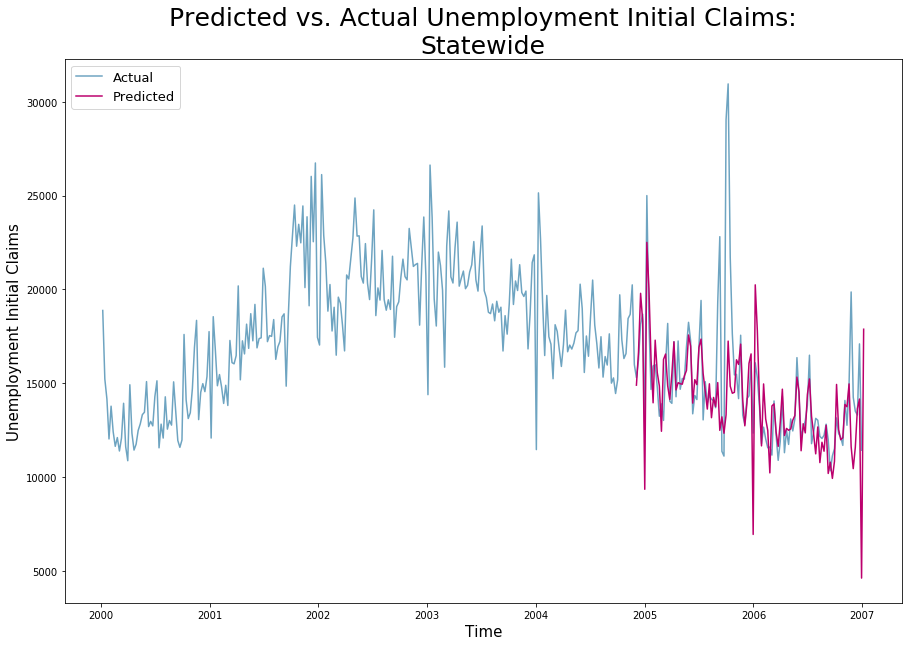

In [476]:
# Plotting data.
plot_preds(unemp[:'2006'][['initial_claims']], preds, 'Statewide', 'Unemployment Initial Claims');

### Orange County Construction Employment

In [495]:
prerita_orange = orange[:'2004-12']
postrita_orange = orange['2005':]

In [496]:
# Checking for stationarity
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

interpret_dftest(adfuller(prerita_orange['employment']))

Test Statistic   -2.548592
p-value           0.104094
dtype: float64

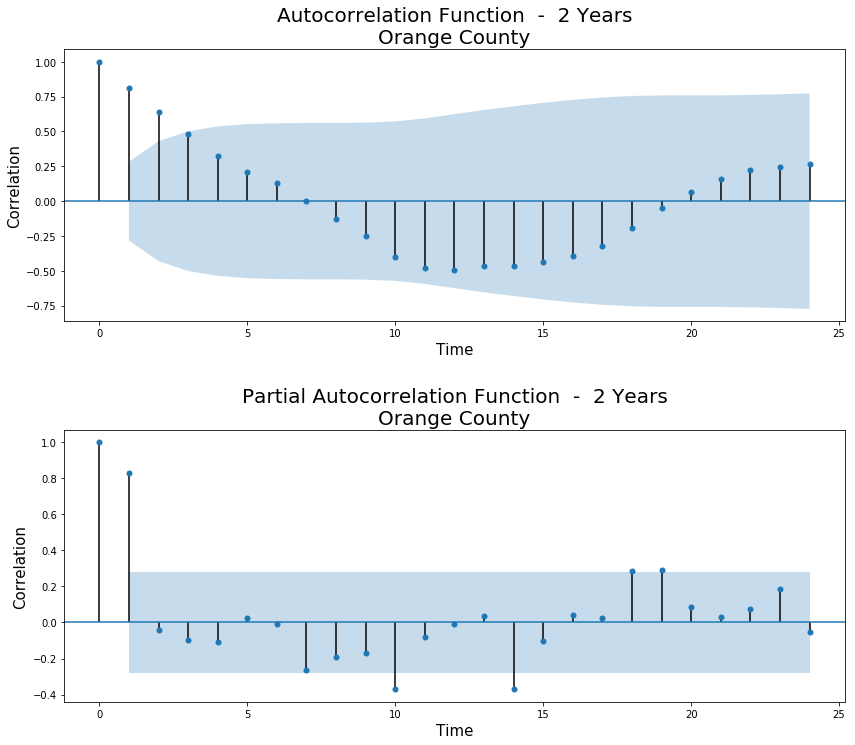

In [499]:
plot_acf_pacf(prerita_orange, 24, '2 Years', 'Orange County')

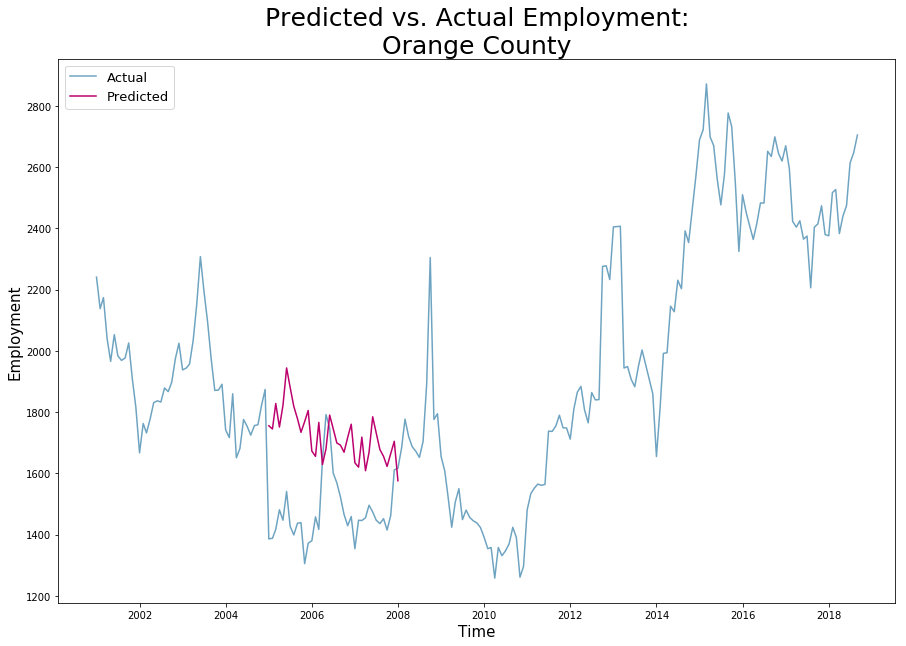

In [516]:
# Running an ARIMA model to predict post-Harvey employment
model = SARIMAX(prerita_orange,
                order=(1,1,0),
               seasonal_order=(1, 1, 0, 12))
arima = model.fit()
preds_post_rita = arima.predict(start='2005', end='2008')

plot_preds(orange, preds_post_rita, 'Orange County', 'Employment')

In [517]:
prerita_jefferson = jefferson[:'2004-12']
postrita_jefferson = jefferson['2005':]

In [518]:
# Checking for stationarity
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

interpret_dftest(adfuller(prerita_jefferson['employment']))

Test Statistic   -1.854046
p-value           0.353978
dtype: float64

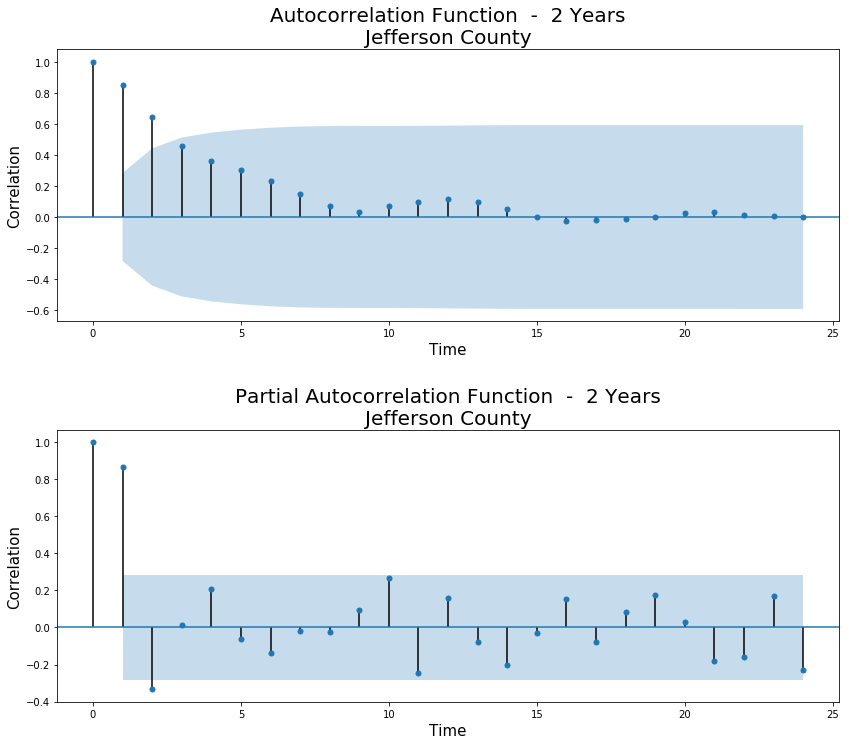

In [520]:
plot_acf_pacf(prerita_jefferson, 24, '2 Years', 'Jefferson County')

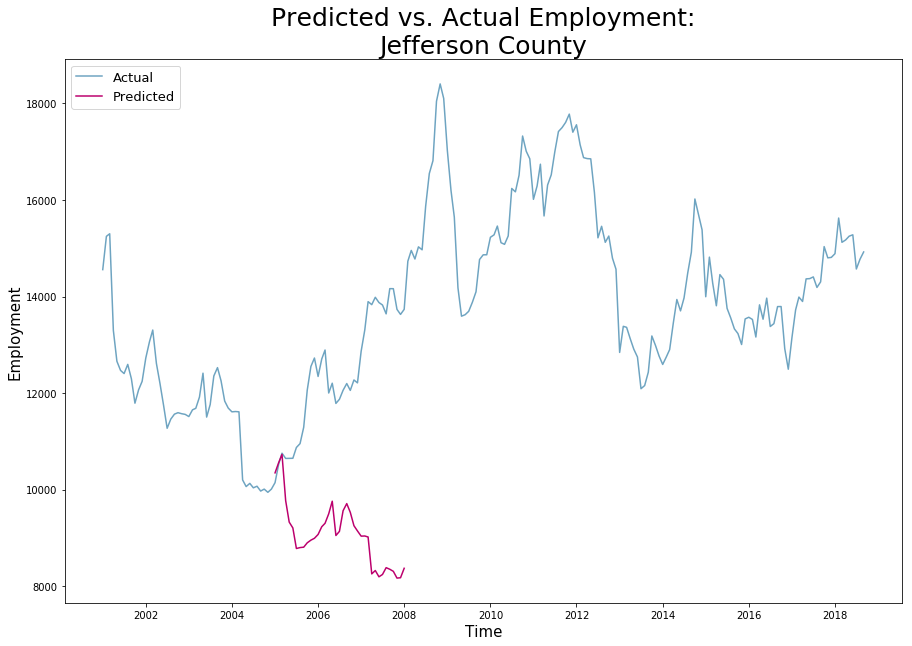

In [575]:
### Running an ARIMA model to predict post-Harvey employment
model = SARIMAX(prerita_jefferson,
                order=(1,0,0),
               seasonal_order=(3, 0, 0, 12))
arima = model.fit()
preds_post_jefferson = arima.predict(start='2005', end='2008')

plot_preds(jefferson, preds_post_jefferson, 'Jefferson County', 'Employment')

# Statewide Monthly Construction

In [587]:
construction_state = pd.read_csv('materials/construction_state.csv')

# Make index a datetime object of year and quarter; dropping original 'Year' column
construction_state.index = pd.to_datetime(construction_state['Year'].astype(str) + '-Q' + 
                                    construction_state['Period'].astype(str))

# Rename columns
construction_state.columns = ['year', 'period', 'estabs', 'firms', 'avg_emp', 'avg_wage', 
                              'total_wages', 'month_1', 'month_2', 'month_3']

for col in construction_state:
    construction_state[col] = construction_state[col].apply(lambda x: str(x).replace(',', ''))
    construction_state[col] = construction_state[col].apply(lambda x: int(x) if x.isdigit() else x)

In [608]:
state_monthly = monthly(construction_state)

In [618]:
pre_rita_construction = state_monthly[:'2004']
post_rita_construction = state_monthly['2005':]

pre_harvey_construction = state_monthly[:'2016']
post_harvey_construction = state_monthly['2017':]

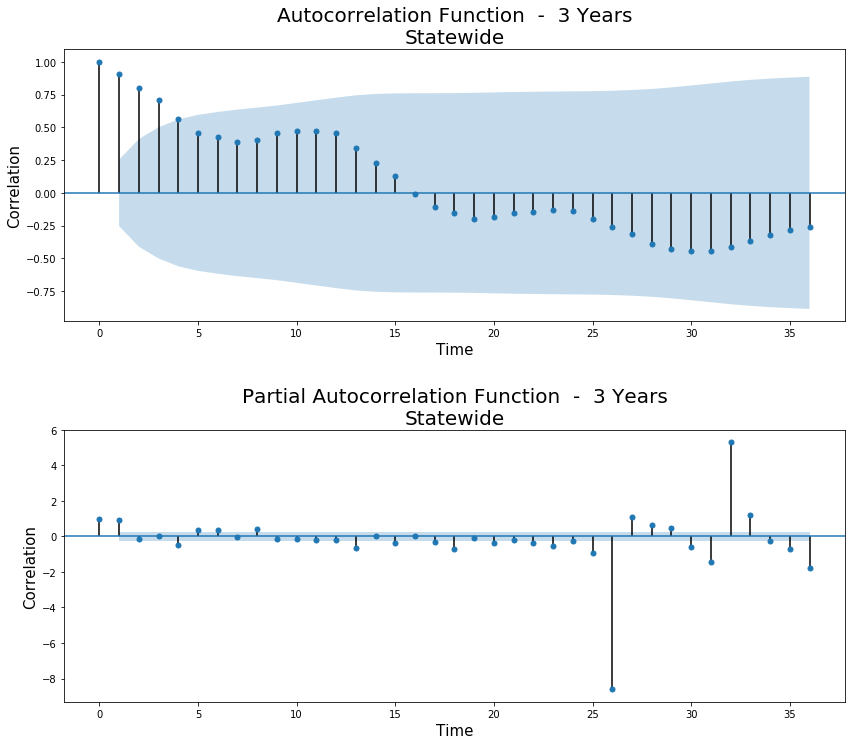

In [624]:
plot_acf_pacf(pre_rita_construction, 36, '3 Years', 'Statewide');

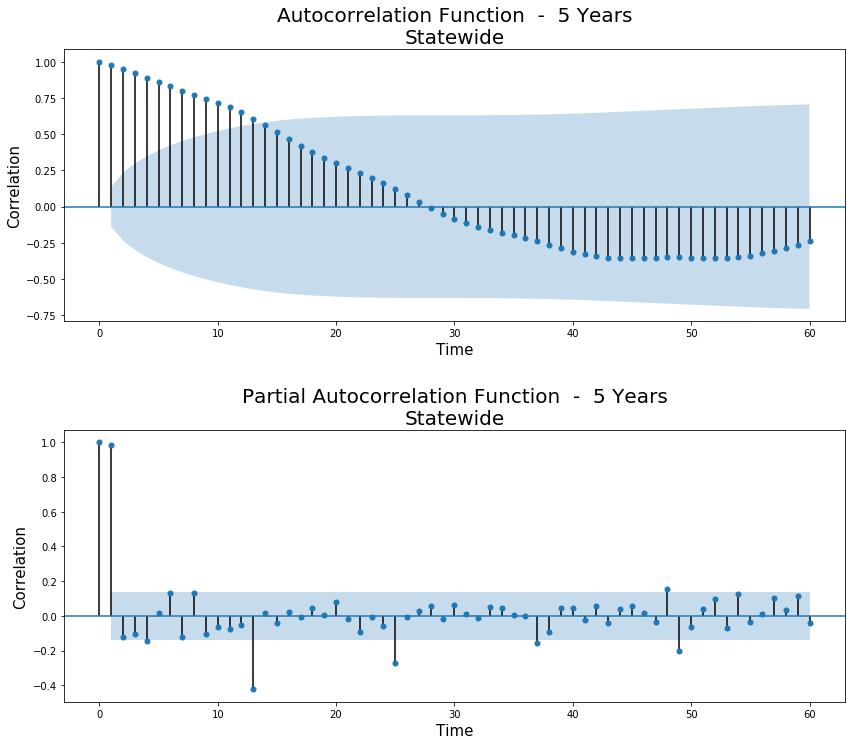

In [625]:
plot_acf_pacf(pre_harvey_construction, 60, '5 Years', 'Statewide')

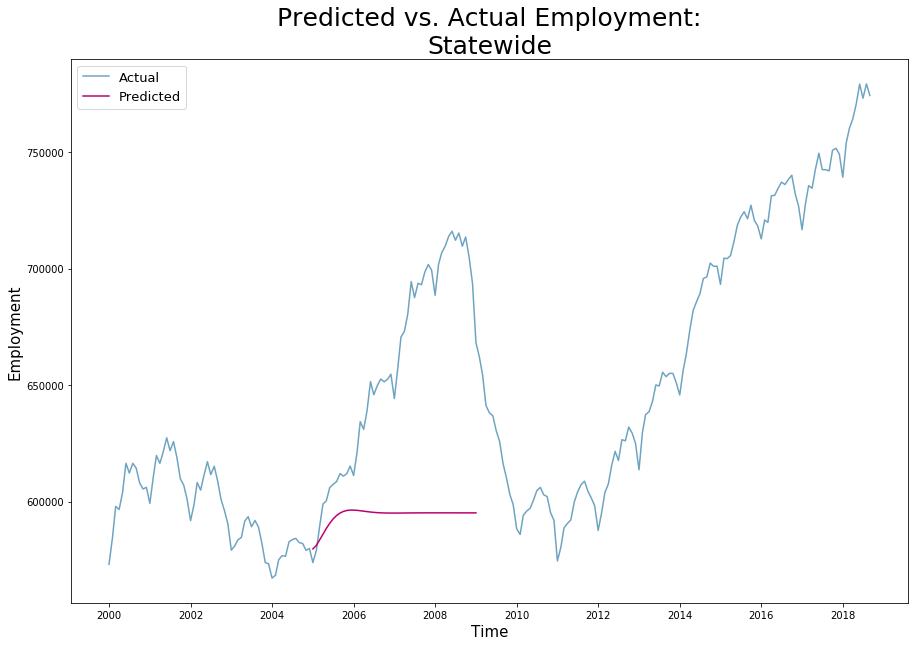

In [675]:
# Running an ARIMA model to predict post-Harvey employment
model = ARIMA(pre_rita_construction,
                order=(2, 0, 2))
arima = model.fit()
preds_rita_construction = arima.predict(start='2005', end='2009')

plot_preds(state_monthly, preds_rita_construction, 'Statewide', 'Employment');

In [701]:
rita_affected = pd.DataFrame(rita.loc[rita['avg_inspected_damage'] > 0, 'county'])
rita_affected['hurricane'] = 'rita'

In [703]:
harvey_affected = pd.DataFrame(harvey.loc[harvey['avg_inspected_damage'] > 0, 'county'])
harvey_affected['hurricane'] = 'harvey'

In [707]:
affected_counties = rita_affected.append(harvey_affected).reset_index().drop('index', axis=1)

In [743]:
hurricanes = pd.DataFrame(affected_counties.groupby('county')['hurricane'].sum())

In [746]:
hurricanes['hurricane'] = hurricanes['hurricane'].map({'rita': 'Rita', 'harvey': 'Harvey', 'ritaharvey': 'Both'})

In [755]:
fips = dict(zip(list(affected_counties.drop_duplicates('county')['county'].values), list(affected_counties.drop_duplicates('county')['fips'].values)))

In [761]:
hurricanes['fips'] = fips.values()

In [763]:
affected_counties = hurricanes

In [764]:
affected_counties

,hurricane,fips
county,,
angelina,Rita,48005
aransas,Harvey,48039
austin,Harvey,48071
bastrop,Harvey,48157
bee,Harvey,48167
brazoria,Both,48199
caldwell,Harvey,48201
calhoun,Harvey,48241
chambers,Both,48245


In [712]:
counties = pd.read_csv('materials/Tx_county_Fips.csv')

In [715]:
counties.columns = ['county', 'fips']

In [717]:
affected_counties = affected_counties.merge(counties, on='county')

In [765]:
affected_counties.to_csv('affected_counties.csv')

In [686]:
# Rita
30949/17240

1.795185614849188

In [685]:
# Harvey
63788/12344

5.167530784186649

In [680]:
rita['total_damage'].sum() / (harvey['total_damage'].sum() + rita['total_damage'].sum())

0.131482935975064

In [677]:
rita['total_damage'].sum() / harvey['total_damage'].sum()

0.15138785571550842